# Visualização de Dados

1. Matplotlib, Seaborn e Ploty

SITUAÇÃO PROBLEMA

Vamos supor que você seja dono de um banco em Taiwan que oferta serviço de crédito. Você tem em mãos uma tabela em excel com dados dos clientes que contrataram o serviço de crédito.

    Objetivo: apresentar um panorama consolidado sobre a situação dos clientes no banco para o restante da empresa.

    Objetivo específico: analisar a situação dos clientes (valor de crédito concedido, valor pago e extrato), nos últimos meses para o ano de 2005 de acordo com o nível de escolaridade.

In [219]:
#     Instalando Bibliotecas
"""
    CASO O PANDAS OU OUTRA BIBLIOTECA UTILIZADA NÂO ESTEJAM INSTALADOS EXECUTE:
      #instalar Pandas 
        !pip install pandas
        !pip install matplotlib
        !pip install seaborn
        !pip install plotly
"""
#     Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [220]:
#     Importando DataSet
credit = pd.read_excel(r'Arquivos da Aplicação\credit_data.xlsx')
credit

,Unnamed: 0,ID,valor_credito,sexo,escolaridade,estado_civil,idade,status_pag_set_2005,status_pag_ago_2005,status_pag_jul_2005,...,extrato_jul_2005,extrato_jun_2005,extrato_mai_2005,extrato_abr_2005,valor_pag_set_2005,valor_pag_ago_2005,valor_pag_jul_2005,valor_pag_jun_2005,valor_pag_mai_2005,valor_pag_abr_2005
0,0,1,20000,2,2,1,24,2,2,-1,...,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,2,2,2,26,-1,2,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2,3,90000,2,2,2,34,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,3,4,50000,2,2,1,37,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,4,5,50000,1,2,1,57,-1,0,-1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29996,220000,1,3,1,39,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,29996,29997,150000,1,3,2,43,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,29997,29998,30000,1,2,2,37,4,3,2,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,29998,29999,80000,1,3,1,41,1,-1,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [221]:
'''     Excluindo dados com escolaridade = 0, pois eles não fazem sentido no DataFrame, tendo em vista
    que os valores da escolaridade são de 1 até 6.
   
   Níveis de escolaridade:
    1 = pós-graduação
    2 = universidade
    3 = ensino médio
    4 = outros
    5 = desconhecido
    6 = desconhecido'''
drop_dados = credit[credit.escolaridade == 0].index
credit.drop(drop_dados, inplace = True)

In [222]:
#     Agrupando Dados
credit_grouped = credit.groupby(['escolaridade']).mean().reset_index()

credit_grouped

,escolaridade,Unnamed: 0,ID,valor_credito,sexo,estado_civil,idade,status_pag_set_2005,status_pag_ago_2005,status_pag_jul_2005,...,extrato_jul_2005,extrato_jun_2005,extrato_mai_2005,extrato_abr_2005,valor_pag_set_2005,valor_pag_ago_2005,valor_pag_jul_2005,valor_pag_jun_2005,valor_pag_mai_2005,valor_pag_abr_2005
0,1,14696.212187,14697.212187,212956.069910,1.588663,1.652338,34.231838,-0.233916,-0.408125,-0.425886,...,45781.689183,42931.065187,40388.891261,38668.076051,6780.933585,7306.622201,6560.585735,5804.565612,5776.562211,6422.554842
1,2,15023.237776,15024.237776,147062.437634,1.616964,1.523022,34.722096,0.102210,0.022523,-0.018532,...,48662.161582,44748.779758,41588.566287,40431.943835,5080.463293,5106.711333,4556.800000,4375.387313,4452.678689,4716.487028
2,3,15341.314013,15342.314013,126550.270490,1.595282,1.421192,40.299980,0.132805,0.040879,0.002644,...,43440.916616,38718.582266,35957.469392,34704.597315,4866.397397,5053.454139,3964.056742,3992.658532,3599.658938,3825.749034
3,4,18142.447154,18143.447154,220894.308943,1.658537,1.601626,33.853659,-0.504065,-0.772358,-0.764228,...,44983.804878,39570.268293,33840.113821,32136.130081,5450.512195,6555.008130,9990.626016,5104.861789,5991.642276,4284.967480
4,5,17442.664286,17443.664286,168164.285714,1.660714,1.475000,35.600000,-0.121429,-0.303571,-0.375000,...,71743.357143,62275.767857,53568.014286,46083.860714,5970.714286,8912.921429,7718.510714,4927.332143,4633.246429,7772.114286
5,6,16894.019608,16895.019608,148235.294118,1.509804,1.490196,43.901961,-0.176471,-0.313725,-0.372549,...,70586.313725,54259.490196,44510.745098,39578.509804,9780.450980,6176.431373,7644.941176,5179.490196,11691.137255,14773.901961


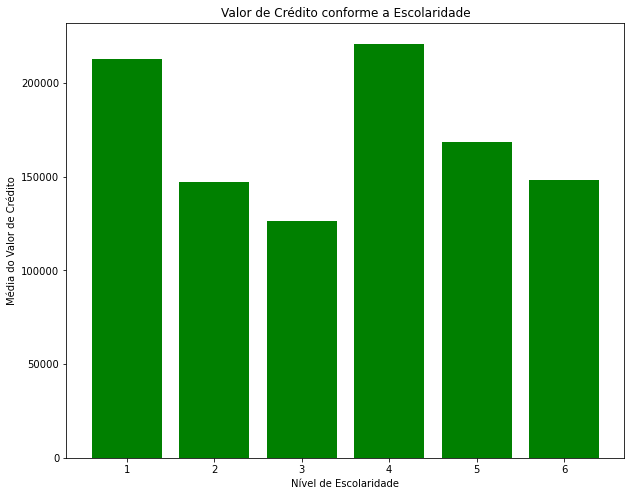

In [223]:
#     Gráfico de barras com Matplotlib
    #    Média de crédito concedida conforme a escolaridade
plt.figure(figsize = (10,8), facecolor= "w") # Configurando tamanho do gráfico
plt.title("Valor de Crédito conforme a Escolaridade") # Configurando título do Gráfico
plt.xlabel("Nível de Escolaridade") # Configurando título do eixo x
plt.ylabel("Média do Valor de Crédito") # Configurando título do eixo y
#Configurando valores dos eixos
plt.bar(credit_grouped.escolaridade, credit_grouped.valor_credito, color = 'Green');

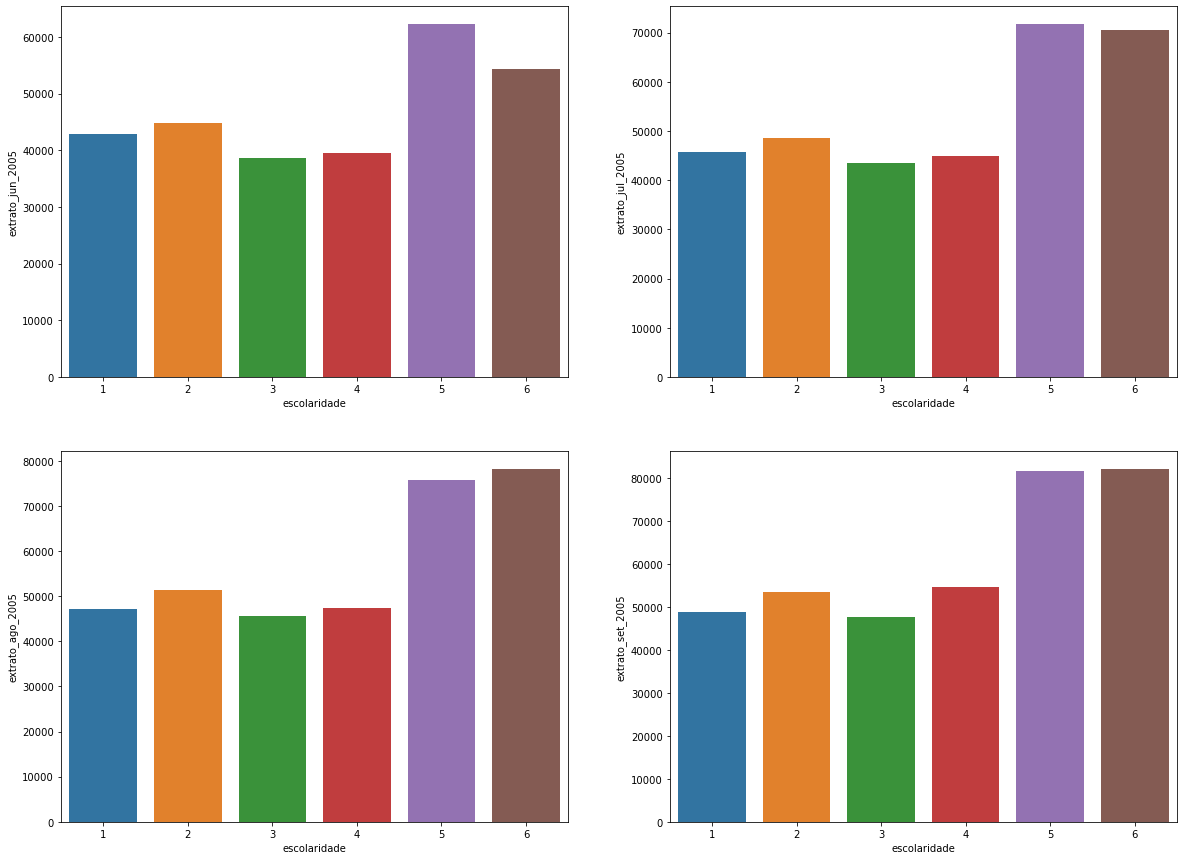

In [224]:
#     Gráficos de barras multiplos com Seaborn
    #     Verificando extrato bancário de acordo com o nível de escolaridade para cada mês
fig, axes = plt.subplots(2, 2, figsize = (20, 15), facecolor = "w")
sns.barplot(data = credit_grouped, x = "escolaridade", y = "extrato_jun_2005", ax = axes[0, 0])
sns.barplot(data = credit_grouped, x = "escolaridade", y = "extrato_jul_2005", ax = axes[0, 1])
sns.barplot(data = credit_grouped, x = "escolaridade", y = "extrato_ago_2005", ax = axes[1, 0])
sns.barplot(data = credit_grouped, x = "escolaridade", y = "extrato_set_2005", ax = axes[1, 1]);

In [225]:
#     Gráfico de barras com Plotly
    #     Valor pago nos últimos conforme escolaridade
fig = go.Figure()

fig.add_trace(go.Bar(x = credit_grouped.escolaridade, 
                     y= credit_grouped.valor_pag_abr_2005,
                    marker_color = "Red",
                    name = "Valor Pago em Abril"))
fig.add_trace(go.Bar(x = credit_grouped.escolaridade, 
                     y= credit_grouped.valor_pag_jun_2005,
                    marker_color = "Green",
                    name = "Valor Pago em Junho"))
fig.add_trace(go.Bar(x = credit_grouped.escolaridade, 
                     y= credit_grouped.valor_pag_jul_2005,
                    marker_color = "Blue",
                    name = "Valor Pago em Julho"))
fig.add_trace(go.Bar(x = credit_grouped.escolaridade, 
                     y= credit_grouped.valor_pag_ago_2005,
                    marker_color = "Yellow",
                    name = "Valor Pago em Agosto"))
fig.add_trace(go.Bar(x = credit_grouped.escolaridade, 
                     y= credit_grouped.valor_pag_set_2005,
                    marker_color = "Purple",
                    name = "Valor Pago em Setembro"))
#     Editando características do gráfico
'''fig.update_layout(title= "Valor Pago em Cada Mês Conforme a Escolaridade",
                  xaxis=dict(title = "Nível de Escolaridade", titlefont_size = 14, tickfont_size = 12),
                  yaxis=dict(title = "Valor Pago", titlefont_size = 14, tickfont_size = 12))'''
#     Salvando Gráfico Interativo em html
fig.write_html(r"Arquivos da Aplicação/Valor pago por escolaridade.html")
#     Mostrando gráfico no output
fig.show()

    Objetivo específico: analisar a situação dos clientes (valor de crédito concedido, valor pago e extrato), nos últimos meses para o ano de 2005 de acordo com a idade.

In [226]:
#     Analizando dados segundo a Idade
    #     Agrupando dados pela idade
credit_gp_idade = credit.groupby(['idade']).mean().reset_index()
credit_gp_idade


,idade,Unnamed: 0,ID,valor_credito,sexo,escolaridade,estado_civil,status_pag_set_2005,status_pag_ago_2005,status_pag_jul_2005,...,extrato_jul_2005,extrato_jun_2005,extrato_mai_2005,extrato_abr_2005,valor_pag_set_2005,valor_pag_ago_2005,valor_pag_jul_2005,valor_pag_jun_2005,valor_pag_mai_2005,valor_pag_abr_2005
0,21,13813.104478,13814.104478,23283.582090,1.686567,2.104478,1.880597,0.194030,0.089552,0.194030,...,14515.701493,12768.373134,11055.074627,7790.910448,2085.776119,1749.716418,1179.865672,1381.865672,827.656716,568.208955
1,22,13798.010714,13799.010714,37928.571429,1.751786,1.969643,1.917857,0.405357,0.401786,0.346429,...,22515.450000,19718.173214,16932.230357,15539.044643,2369.537500,2408.187500,1845.053571,1743.666071,1661.521429,1542.930357
2,23,14261.792696,14262.792696,59752.953813,1.720730,1.888292,1.905478,0.250269,0.183673,0.131042,...,26876.412460,23830.878625,22221.128894,21363.386681,3239.650913,3167.992481,2833.618690,2633.437164,2278.273899,2668.021482
3,24,14149.837622,14150.837622,75661.047028,1.685004,1.842059,1.879326,0.223602,0.147294,0.110914,...,31003.772848,27955.181899,26043.818101,25660.377107,3437.509317,3456.996451,2667.676131,2734.072760,2987.842946,2745.241349
4,25,14540.063238,14541.063238,102731.871838,1.671164,1.779933,1.870995,0.155143,0.069140,0.087690,...,38327.632378,34916.935919,31979.716695,30657.220067,4711.833895,3721.000000,3363.674536,3640.538786,2949.698988,3636.136594
5,26,14592.886943,14593.886943,128813.694268,1.630573,1.773885,1.858280,0.120223,0.038217,-0.021497,...,43776.285828,39513.843949,35831.103503,34551.278662,4783.465764,4635.628185,3940.216561,3638.614650,4086.846338,4628.853503
6,27,14974.387271,14975.387271,147941.773866,1.641842,1.689912,1.834800,0.045362,-0.098172,-0.146242,...,46371.018957,43062.862559,40918.643873,39488.114421,5230.849695,5302.418416,4649.622207,4551.387949,4556.484766,4526.699391
7,28,15139.129972,15140.129972,170958.806818,1.641335,1.665483,1.798295,-0.002841,-0.104403,-0.130682,...,50055.903409,46826.700284,43557.306818,42475.941761,6151.973722,5606.740767,5787.330966,4625.855824,5139.367188,5425.638494
8,29,14926.917757,14927.917757,179401.869159,1.615576,1.621184,1.793769,-0.062928,-0.158255,-0.191900,...,48301.691589,44727.031776,42673.198754,42065.074143,5820.047352,5878.453583,5074.471651,5339.152025,5506.229907,4963.722118
9,30,15160.833453,15161.833453,189461.593683,1.597990,1.692032,1.717875,-0.086145,-0.188083,-0.192391,...,51592.762383,48100.109835,44904.565686,43738.292893,6074.815506,7668.456569,6238.377602,5582.819095,5930.862886,6408.609476


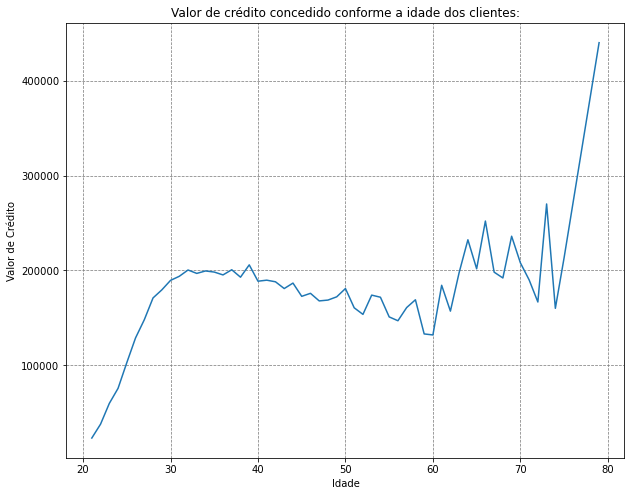

In [227]:
#     Gráfico de linha com Matplotlib
plt.figure(figsize = (10, 8), facecolor= "w")

#     Título do gráfico
plt.title("Valor de crédito concedido conforme a idade dos clientes:")
#     Título dos Eixos
plt.xlabel("Idade")
plt.ylabel("Valor de Crédito")

#     Plotando gráfico com a primeira variável referente ao eixo x e a segunda ao eixo y
plt.plot(credit_gp_idade.idade, credit_gp_idade.valor_credito);

plt.grid(b = True, color = 'gray', linestyle= '--', linewidth = 0.75)

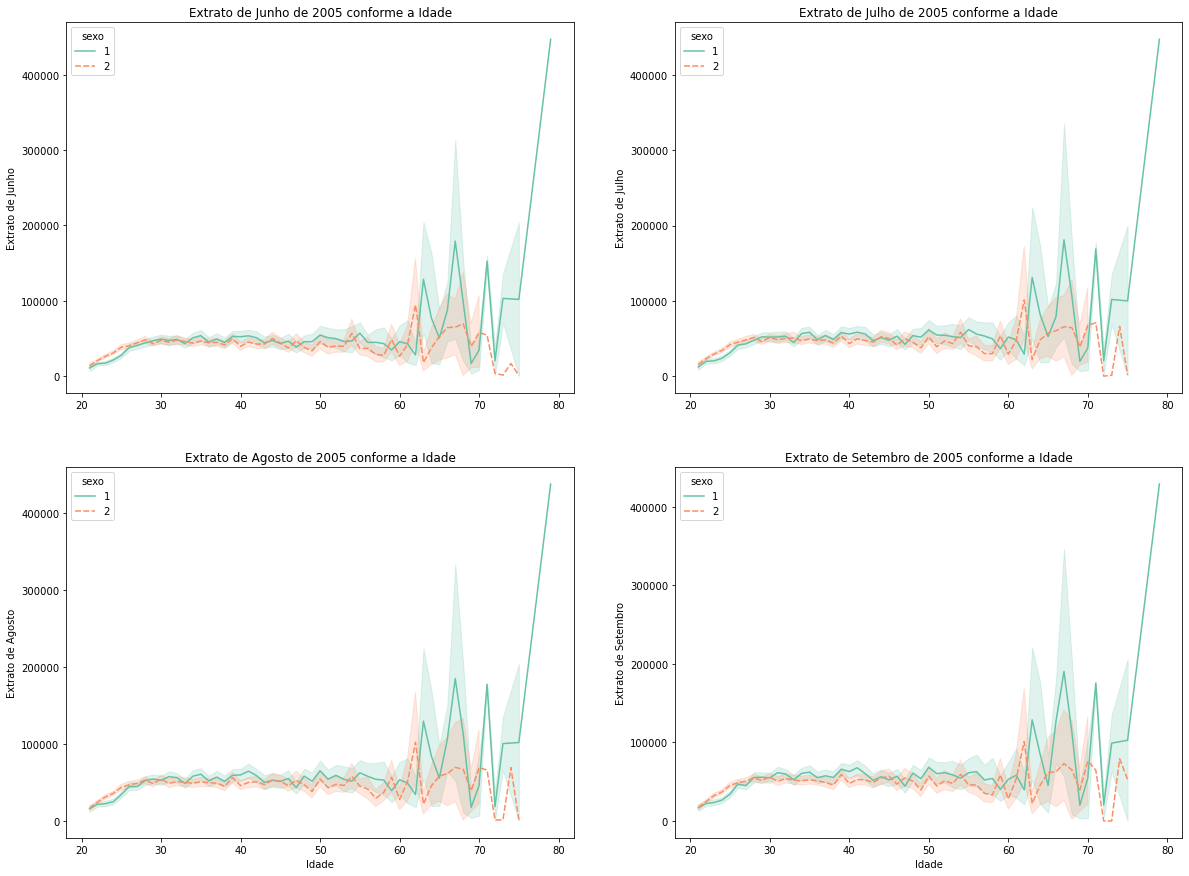

In [228]:
#     Gráficos de linha usando Seaborn
    #     Analisando Extrato Bancário dos Clientes

#     Criando Matriz de Gráficos de 2 x 2 e  definindo tamanho
fig, axes = plt.subplots(2, 2, figsize = (20, 15), facecolor = "w")
#     Preenchendo cada plano cartesiano categorizando pelo sexo(hue =) e estilisando o gráfico
    #     1- Masculino    2- Feminino
sns.lineplot(data = credit, x = "idade", y = "extrato_jun_2005",
             hue = "sexo", style = "sexo", palette = "Set2", ax = axes[0,0]).set(
    title = "Extrato de Junho de 2005 conforme a Idade", xlabel = None, ylabel = "Extrato de Junho")
sns.lineplot(data = credit, x = "idade", y = "extrato_jul_2005",
             hue = "sexo", style = "sexo", palette = "Set2", ax = axes[0,1]).set(
    title = "Extrato de Julho de 2005 conforme a Idade", xlabel = None, ylabel = "Extrato de Julho")
sns.lineplot(data = credit, x = "idade", y = "extrato_ago_2005",
             hue = "sexo", style = "sexo", palette = "Set2", ax = axes[1,0]).set(
    title = "Extrato de Agosto de 2005 conforme a Idade", xlabel = "Idade", ylabel = "Extrato de Agosto")
sns.lineplot(data = credit, x = "idade", y = "extrato_set_2005",
             hue = "sexo", style = "sexo", palette = "Set2", ax = axes[1,1]).set(
    title = "Extrato de Setembro de 2005 conforme a Idade", xlabel = "Idade", ylabel = "Extrato de Setembro");


In [309]:
#     Gráfico de linhas utilizando Plotly
    #     Valor pago ao longo dos meses conforme a idade
#     Criando Plano cartesiano
fig_pag_idd = go.Figure()

''' (rows=) : Quantidade de linhas com gráficos
    (cols=) : Quantidade de colunas com gráficos
    (shared_yaxes=) : Se os gráficos vão compartilhar o mesmo eixo y, se sim = True, se não = False
    (subplot_titles=) : Títulos dos subplots 
''' 

#     Criando vários subplots
fig_pag_idd = make_subplots( rows = 3, cols = 2, shared_yaxes = True,
                            subplot_titles = ("Abril","Maio","Junho","Julho","Agosto","Setembro"))
#     Criando gráfico da linha 1 coluna 1 referente à Abril e definindo a cor e grossura do traço
fig_pag_idd.add_trace(go.Scatter( x = credit_gp_idade.idade,
                                 y = credit_gp_idade.valor_pag_abr_2005,
                                 line = dict(color = "red", width = 1.5),
                                 name = "Valor Pago em 04/2005"), row = 1, col = 1
                                )
#     Criando gráfico da linha 1 coluna 2 referente à Maio e definindo a cor e grossura do traço
fig_pag_idd.add_trace(go.Scatter( x = credit_gp_idade.idade,
                                 y = credit_gp_idade.valor_pag_mai_2005,
                                 line = dict(color = "blue", width = 1.5),
                                 name = "Valor Pago em 05/2005"), row = 1, col = 2
                                )
#     Criando gráfico da linha 2 coluna 1 referente à Junho e definindo a cor e grossura do traço
fig_pag_idd.add_trace(go.Scatter( x = credit_gp_idade.idade,
                                 y = credit_gp_idade.valor_pag_jun_2005,
                                 line = dict(color = "green", width = 1.5),
                                 name = "Valor Pago em 06/2005"), row = 2, col = 1
                                )
#     Criando gráfico da linha 2 coluna 2 referente à Julho e definindo a cor e grossura do traço
fig_pag_idd.add_trace(go.Scatter( x = credit_gp_idade.idade,
                                 y = credit_gp_idade.valor_pag_jul_2005,
                                 line = dict(color = "purple", width = 1.5),
                                 name = "Valor Pago em 07/2005"), row = 2, col = 2
                                )
#     Criando gráfico da linha 3 coluna 1 referente à Agosto e definindo a cor e grossura do traço
fig_pag_idd.add_trace(go.Scatter( x = credit_gp_idade.idade,
                                 y = credit_gp_idade.valor_pag_ago_2005,
                                 line = dict(color = "yellow", width = 1.5),
                                 name = "Valor Pago em 08/2005"), row = 3, col = 1
                                )
#     Criando gráfico da linha 3 coluna 2 referente à Setembro e definindo a cor e grossura do traço
fig_pag_idd.add_trace(go.Scatter( x = credit_gp_idade.idade,
                                 y = credit_gp_idade.valor_pag_set_2005,
                                 line = dict(color = "#FF0092", width = 1.5),
                                 name = "Valor Pago em 09/2005"), row = 3, col = 2
                                )
#     Colocando um titulo
fig_pag_idd.update_layout(title = "Valor pago por mês conforme a idade dos clientes")
#     Editando as descrições das linhas e colunas conforme a necessidade
fig_pag_idd.update_yaxes(title_text = "Valor pago (Dólar NT)", row = 1, col = 1, titlefont_size = 10)
fig_pag_idd.update_yaxes(title_text = "Valor pago (Dólar NT)", row = 1, col = 2, titlefont_size = 10)
fig_pag_idd.update_yaxes(title_text = "Valor pago (Dólar NT)", row = 2, col = 1, titlefont_size = 10)
fig_pag_idd.update_yaxes(title_text = "Valor pago (Dólar NT)", row = 2, col = 2, titlefont_size = 10)
fig_pag_idd.update_yaxes(title_text = "Valor pago (Dólar NT)", row = 3, col = 1, titlefont_size = 10)
fig_pag_idd.update_yaxes(title_text = "Valor pago (Dólar NT)", row = 3, col = 2, titlefont_size = 10)

fig_pag_idd.update_xaxes(title_text = "Idade do Cliente", row = 3, col = 1, titlefont_size = 10)
fig_pag_idd.update_xaxes(title_text = "Idade do Cliente", row = 3, col = 2, titlefont_size = 10)

#     Salvando Gráficos Interativos
fig_pag_idd.write_html("Arquivos da Aplicação/Valor Pago por Idade.html")

#     Mostrando Gráficos
fig_pag_idd.show()


    Objetivo específico: analisar a situação dos clientes (valor de crédito concedido, valor pago e extrato), nos últimos meses para o ano de 2005 de acordo com o sexo.

In [230]:
#     Gráfico de Pizza com matplotlib
    #     Analizando o valor de crédito conforme o sexo
#     Agrupando valores do DataSet por Sexo
credit_gp_sexo = credit.groupby(["sexo"]).mean().reset_index()
credit_gp_sexo


,sexo,Unnamed: 0,ID,valor_credito,escolaridade,estado_civil,idade,status_pag_set_2005,status_pag_ago_2005,status_pag_jul_2005,...,extrato_jul_2005,extrato_jun_2005,extrato_mai_2005,extrato_abr_2005,valor_pag_set_2005,valor_pag_ago_2005,valor_pag_jul_2005,valor_pag_jun_2005,valor_pag_mai_2005,valor_pag_abr_2005
0,1,14799.930640,14800.930640,163486.841751,1.840488,1.571970,36.518687,0.063552,-0.028535,-0.067761,...,49138.733754,45021.779545,41611.462374,40127.819444,5666.816330,5956.018350,5408.779630,4869.677020,4832.972559,5277.782576
1,2,15128.827958,15129.827958,170068.816967,1.862863,1.538551,34.804982,-0.068983,-0.202143,-0.230200,...,45641.289462,42132.046007,39483.824644,38073.594168,5661.239147,5892.796532,5102.761018,4798.401359,4779.097040,5176.345907


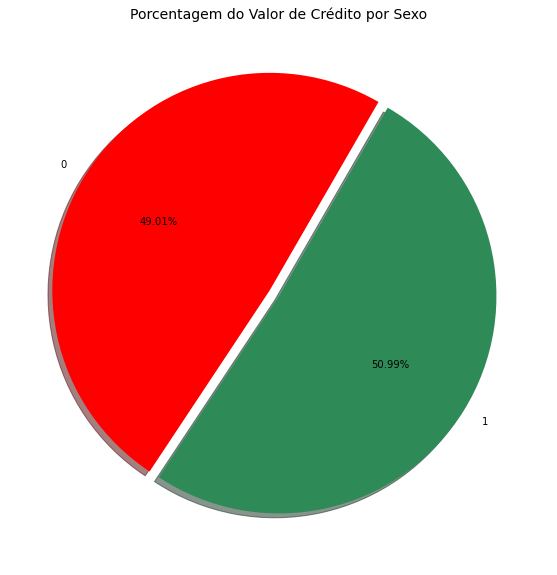

In [262]:
#     Iniciando Gráfico
fig_sx, ax = plt.subplots(figsize = (10, 10), facecolor= 'w')

#     Colocando especificações do gráfico
ax.pie(credit_gp_sexo.valor_credito, labels = credit_gp_sexo.index, autopct = "%.2f%%", shadow= True,
      startangle = 60, colors = ["red","seagreen"], explode = (0.05, 0)
      )
ax.set_title("Porcentagem do Valor de Crédito por Sexo", fontsize = 14);
#     1- Masculino    2- Feminino




In [311]:
#     Gráfico de Pizza com Plotly

#     Iniciando Gráfico    
fig_pag_sx = make_subplots(rows = 1, cols = 2, specs = [[{'type' : 'domain'},{'type' : 'domain'}]])

#     DefininDo variáveis dos gráficos
fig_pag_sx.add_trace(go.Pie(labels = credit_gp_sexo.sexo,
                            values = credit_gp_sexo.extrato_abr_2005, name = "Abril"),1,1)
fig_pag_sx.add_trace(go.Pie(labels = credit_gp_sexo.sexo,
                            values = credit_gp_sexo.extrato_set_2005, name = "Setembro"),1,2)

#     Editando algumas caracteristicas dos gráficos
fig_pag_sx.update_traces(hole = .4) # Cria um buraco no centro do Gráfico

#     Definindo título e posição das descrições
fig_pag_sx.update_layout(title_text = "Extrato de Pagamento de Abril e Setembro por sexo",
                        annotations =  [dict(text = 'Abril', x = 0.19 , y = 0.5, font_size = 18,
                                             showarrow = False),
                                       dict(text = 'Setembro', x = 0.84 , y = 0.5, font_size = 18,
                                             showarrow = False)])

#     Salvando Gráfico Interativo
fig_pag_sx.write_html("Arquivos da Aplicação/Gráfico de Pizza do Extrato de Pag de Abr e Set por sexo.html")

#     Mostrando Gráfico
fig_pag_sx.show()